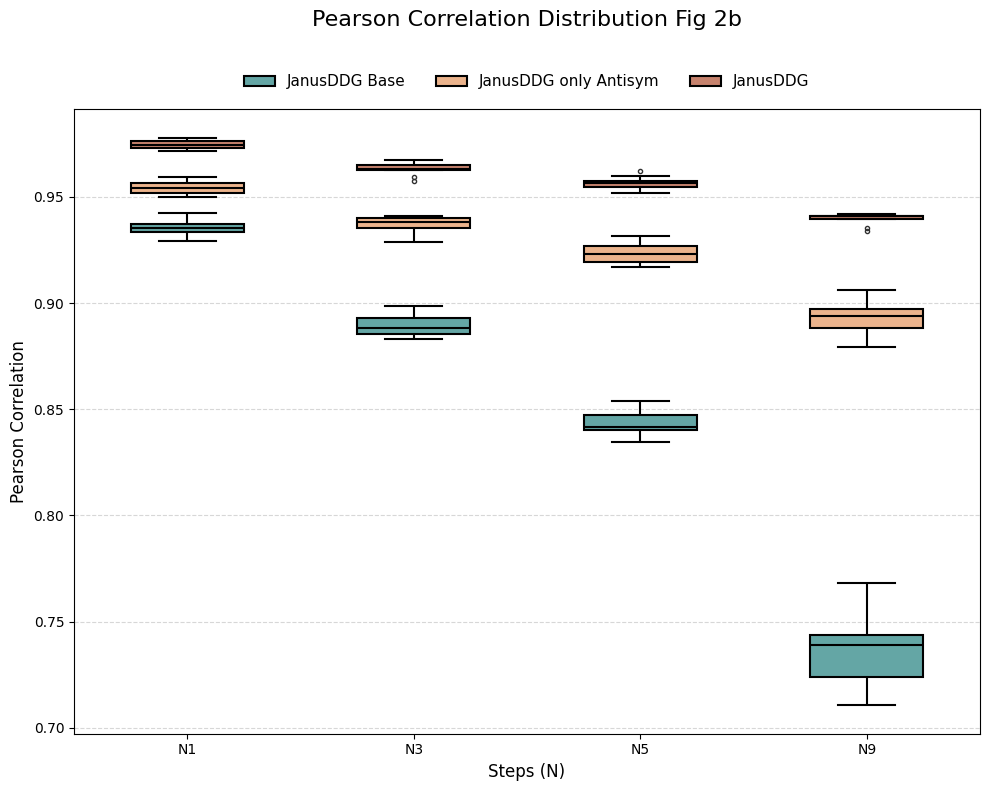

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

filename_pattern = 's669_DDGjanus{variant}_TRANSITIVITY_N{n}.csv'
variants = ['BASE', 'BASEANTY', '_FINALE']
steps = [1, 3, 5, 9]

name_mapping = {
    "BASE": "JanusDDG Base",
    "BASEANTY": "JanusDDG only Antisym",
    "FINALE": "JanusDDG"
}

custom_palette = {
    "JanusDDG Base": "#12908E",      
    "JanusDDG only Antisym": "#F98F45", 
    "JanusDDG": "#c4421A"            
}

all_data = []

for variant in variants:
    raw_variant_name = variant.lstrip('_')
    display_name = name_mapping.get(raw_variant_name, raw_variant_name)
    
    try:
        file_n0 = filename_pattern.format(variant=variant, n=0)
        df_n0 = pd.read_csv(file_n0, index_col=0)
        vec_n0 = pd.to_numeric(df_n0.iloc[:, 0].values, errors='coerce')
    except FileNotFoundError:
        print(f"Skipping {variant}: N0 not found.")
        continue

    for n in steps:
        step_label = f"N{n}"
        file_nx = filename_pattern.format(variant=variant, n=n)
        try:
            df_nx = pd.read_csv(file_nx, index_col=0)
            min_len = min(len(vec_n0), len(df_nx))
            v_start = vec_n0[:min_len]
            df_nx_trimmed = df_nx.iloc[:min_len, :]
            
            for col in df_nx_trimmed.columns:
                v_col = pd.to_numeric(df_nx_trimmed[col], errors='coerce').values
                mask = ~np.isnan(v_start) & ~np.isnan(v_col)
                if np.sum(mask) >= 2:
                    corr, _ = pearsonr(v_start[mask], v_col[mask])
                    all_data.append({'Variant': display_name, 'Step': step_label, 'Pearson': corr})
        except FileNotFoundError:
            continue

if all_data:
    df_plot = pd.DataFrame(all_data)
    
    plt.figure(figsize=(10, 8))
    
    order_steps = [f"N{n}" for n in steps]

    ax = sns.boxplot(
        data=df_plot, 
        x='Step', 
        y='Pearson', 
        hue='Variant',
        order=order_steps,
        palette=custom_palette, 
        dodge=False,       
        width=0.5,         
        linewidth=1.5,     
        fliersize=3       
    )
    

    for patch in ax.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.7)) 
        patch.set_edgecolor('black')        

    for line in ax.lines:
        line.set_color('black')            


    plt.title('Pearson Correlation Distribution Fig 2b', fontsize=16, y=1.12)
    plt.ylabel('Pearson Correlation', fontsize=12)
    plt.xlabel('Steps (N)', fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    
    plt.legend(
        title=None,             
        loc='lower center',      
        bbox_to_anchor=(0.5, 1.01), 
        ncol=3,                  
        frameon=False,           
        fontsize=11
    )
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Nessun dato valido trovato.")

In [2]:
#FIG 2C

In [3]:
pred_trans = pd.read_csv('../results/Result_Stransitive_second_random_step.csv')['DDG_JanusDDG'] + pd.read_csv('../results/Result_Stransitive_first_random_step.csv')['DDG_JanusDDG']
no_trans = pd.read_csv('../results/Result_Stransitive_to_process.csv')['DDG_JanusDDG']
Janus_final_p = pearsonr(pred_trans,no_trans)

In [4]:
pred_trans = pd.read_csv('../results/Result_Stransitive_second_random_step_ANTY.csv')['DDG_JanusDDG'] + pd.read_csv('../results/Result_Stransitive_first_random_step_ANTY.csv')['DDG_JanusDDG']
no_trans = pd.read_csv('../results/Result_Stransitive_to_process_ANTY.csv')['DDG_JanusDDG']
Janus_anty_p = pearsonr(pred_trans,no_trans)

In [5]:
pred_trans = pd.read_csv('../results/Result_Stransitive_second_random_step_BASE.csv')['DDG_JanusDDG'] + pd.read_csv('../results/Result_Stransitive_first_random_step_BASE.csv')['DDG_JanusDDG']
no_trans = pd.read_csv('../results/Result_Stransitive_to_process_BASE.csv')['DDG_JanusDDG']
Janus_base_p = pearsonr(pred_trans,no_trans)

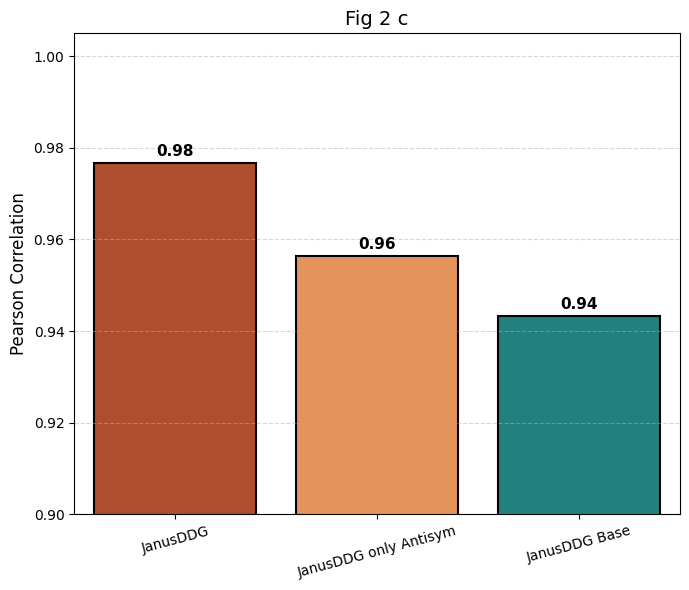

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Dati
plot_data = pd.DataFrame({
    'Variant': ['JanusDDG', 'JanusDDG only Antisym', 'JanusDDG Base'],
    'Pearson': [Janus_final_p[0], Janus_anty_p[0], Janus_base_p[0]]
})

# 2. Palette
custom_palette = {
    "JanusDDG Base": "#12908E",        
    "JanusDDG only Antisym": "#F98F45", 
    "JanusDDG": "#c4421A"              
}

plt.figure(figsize=(7, 6))

# 3. Barplot
# Aggiungiamo hue='Variant' e legend=False per gestire correttamente i colori 
# ed evitare warning nelle nuove versioni di Seaborn
ax = sns.barplot(
    data=plot_data,
    x='Variant',
    y='Pearson',
    hue='Variant',      # Associa il colore alla variante
    palette=custom_palette,
    edgecolor='black',  
    linewidth=1.5,
    legend=False        # Nascondiamo la legenda (i nomi sono già sull'asse X)
)

# 4. FIX: Ciclo su TUTTI i container per mettere le etichette su tutte le barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=11, fontweight='bold')

# Estetica
plt.ylim(0.9, 1.005)
plt.title("Fig 2 c", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylabel('Pearson Correlation', fontsize=12)
plt.xlabel('') 

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()